# Introdução

No início do terceiro triênio da estratégia em rede <strong data-cite="feldhaus2012gestao">(Calegari, 2012)</strong> idealizada por Diego Calegari, Presidente Executivo da Brasil Júnior em 2009, 7 anos antes era chegada a hora, em 2016, de direcionar o Movimento Empresa Júnior para trazer impacto à sociedade.

Depois de um primeiro triênio cujo maior desafio foi estabelecer o conceito de Empresa Júnior como se entende hoje e um segundo triênio dedicado a melhorar os processos de gestão das EJs, Ianna Brandão, Diretora de Desenvolvimento da Rede em 2016, deu início ao mote "Mais e Melhores Projetos". As estratégias e os conceitos trazidos por ela, como uma definição única de "projeto" e uma plataforma integrada para auditoria, isto é, o que veio a se tornar o Portal BJ, foram responsáveis por gerar em pouco mais de 2 anos tanto resultado quanto se havia gerado nos 27 anos anteriores do Movimento.

A nova riqueza e complexidade que abarcou o Movimento fez as antigas estratégias de suporte da Brasil Júnior e das Federações se tornarem insuficientes. Como prestariam o tão necessário direcionamento que as EJs precisavam num contexto tão diverso? Este foi o problema motivador da criação do Sistema de Clusters em 2017 <strong data-cite="clusters2017">(Leite, 2017)</strong> que trouxe como solução a separação das EJs em grupos, ou *clusters*, de acordo com as dores que estas comumente sentem ao longo dos seus estágios de amadurecimento.

Em 2019, após a recriação da estratégia compartilhada da rede através do projeto "Futuro do MEJ", tornou-se necessário reconstruir os fundamentos da clusterização. Este processo culminou no atual entendimento do conceito de cluster e das dores associadas a cada um deles que podem ser verificadas através [deste link](bit.ly/CLUSTERS) <strong data-cite="clusters2019">(Bezerra, 2019)</strong>.

Este documento visa a análise dos dados gerados a partir do formulário de diagnóstico das Empresas Juniores inscritas no Programa de Suporte da SERJÚNIOR em 2020 que toma por base a clusterização.

# Análise

## Considerações Iniciais

Todos os arquivos utilizados, bem como a versão editável deste documento podem ser encontrados [neste repositório](https://github.com/gustavomello9600/clusters).

Ao leitor não técnico, recomenda-se que se leia de forma superficial as etapas de Tratamento e Modelagem e que se dê especial ênfase à etapa de Discussão. Nas seções de código, é suficiente ler apenas as linhas que se iniciam com "#".

Ao longo do texto, buscou-se esclarecer em linguagem simples e natural, até onde foi possível, o significado dos conceitos abordados e do código empregado; além de se levar em conta os procedimentos necessários para garantir a reprodutibilidade da análise.

Todas as ferramentas de análise utilizadas são provenientes de bibliotecas gratuitas das linguagens de programação R e Python.

## Tratamento

As linhas de código abaixo servem para garantir que, em qualquer sistema operacional, os dados serão encontrados.

In [65]:
#Traz as ferramentas que o Python precisa para se mover dentre
#as pastas do sistema operacional em que está sendo executado
import os

#Ensina o Python a encontrar os dados do diagnóstico
caminho_para_os_dados =  os.path.join("dados",
                                      "clusters.csv")


#Traz as ferramentas de cálculo numérico
import numpy as np

#Carrega a integração entre as linguagens R e Python
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [2]:
%%R -i caminho_para_os_dados
#Chama a linguagem R e fornece o caminho para os dados do diagnóstico

#Carrega as ferramentas de análise
library(tidyverse)

#Lê os dados e os formata para a análise
entrada <- read.csv(caminho_para_os_dados)
entrada <- as_tibble(entrada)

#Processa e organiza os dados carregados 
processada <- entrada %>%
                  pivot_longer(
                       cols = -EJs,
                       names_to = c("Eixo", "Cluster", "Dores"),
                       names_pattern = "([A-Z]+)_([1-5])_([1-5])",
                       values_to = "Resposta")
    
#Agrupa os dados por EJ, Cluster e Eixo e calcula a média das
#respostas para cada um desses grupos
empresas_juniores <- processada %>%
                         group_by(EJs, Cluster, Eixo) %>%
                         summarise(Media=mean(Resposta))

#Gera uma base de dados para cada Eixo
ejs_por_MN <- empresas_juniores %>% filter(Eixo == "MN")
ejs_por_VM <- empresas_juniores %>% filter(Eixo == "VM")
ejs_por_TC <- empresas_juniores %>% filter(Eixo == "TC")
ejs_por_GO <- empresas_juniores %>% filter(Eixo == "GO")


#Agrupa os dados por EJ e Cluster e calcula a
#média das respostas para cada um desses grupos
ejs_por_cluster <- empresas_juniores %>%
                       group_by(EJs, Cluster) %>%
                       summarise(Media=mean(Media))
        
#Agrupa os dados por Cluster, Eixo e Dores,
#calcula a média para cada grupo e organiza a tabela
#de modo que as dores mais presentes fiquem no topo
dores <- processada %>%
             group_by(Cluster, Eixo, Dores) %>%
             summarise(Media=mean(Resposta)) %>%
             arrange(desc(Media))

#Mostra as primeiras linhas da tabela gerada acima
print(head(dores))

#Sumariza as dores por eixo
eixos <- dores %>%
             group_by(Eixo) %>%
             summarize(Media=mean(Media)) %>%
             arrange(desc(Media))

#Mostra o sumário por eixo
eixos

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

R[write to console]: ✔ ggplot2 3.3.1     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



`summarise()` regrouping output by 'EJs', 'Cluster' (override with `.groups` argument)
`summarise()` regrouping output by 'EJs' (override with `.groups` argument)
`summarise()` regrouping output by 'Cluster', 'Eixo' (override with `.groups` argument)
# A tibble: 6 x 4
# Groups:   Cluster, Eixo [5]
  Cluster Eixo  Dores Media
  <chr>   <chr> <chr> <dbl>
1 5       VM    2      3   
2 5       VM    1      2.67
3 2       TC    1      2.58
4 3       TC    2      2.58
5 1       TC    1      2.5 
6 4       VM    1      2.5 
`summarise()` ungrouping output (override with `.groups` argument)
# A tibble: 4 x 2
  Eixo  Media
  <chr> <dbl>
1 VM     2.17
2 TC     1.94
3 MN     1.73
4 GO     1.69


O que a primeira tabela nos diz em sua primeira linha, por exemplo, é que a dor mais latente das EJs inscritas no programa de suporte, de acordo com suas respostas ao formulário de diagnóstico, é a 2ª dor do eixo de Vendas & Mercado no Cluster 5. Consultando o documento, vemos que esta corresponde a:

> Temos dificuldade de encontrar nichos de mercados alternativos para serem explorados e posicionar nossa marca em canais que os atinjam.

As demais dores, em ordem de colocação, são:

> Não realizamos investimentos em estruturas que tornem nosso processo de vendas mais inteligente e automatizado.

> O engajamento dos nossos membros é muito desproporcional, o que gera picos de produtividade e inconstância de resultados.

> Nossos membros são pouco proativos em empreenderem mudanças importantes para a nossa EJ.

> Temos dificuldade em atrair membros para a EJ.

> Não temos uma inteligência de vendas para tornar a prospecção de novos negócios e vendas mais eficiente.

Já a segunda tabela mostra que a maioria das dores estão concentradas nos eixos de **Vendas & Mercado** e **Time & Cultura**.

## Modelagem

### Análise de Componentes Principais

Esta técnica consiste em encontrar os padrões de variação mais comuns em um grupo de dados. Para os fins desta análise, considera-se que o padrão de identificação geral de uma EJ com as dores de cada cluster pode ser representada como um sinal, isto é, como na imagem abaixo:

![EJs](output_9_1.png)

A EJ hipotética acima representada em azul tem um "Sinal de Cluster" mais forte no 1 e no 4. Na prática, isto significa que a maior parte das suas dores estão no cluster 1, uma menor parte no 4 e nenhuma nas demais. Repare que as EJs em verde e vermelho representadas por traços pontilhados tem perfis próximos. 

É notável ao olho humano que o sinal verde é mais próximo ao azul do que o vermelho o é. A Análise de Componentes Principais, ou PCA, como comumente é referida, enxerga, no entanto, os dois sinais como distantes do azul na mesma medida. Para contornar este problema, basta "espalhar" um pouco o sinal de cada EJ. Isto pode ser feito através de uma operação conhecida na Álgebra Linear como "mudança de base". O resultado de um sinal puro e unitário de cluster 1 ao ser "espalhado" é o que pode ser visto na figura abaixo:

![Sinal Espalhado](output_8_1.png)

O sinal azul é o original e o sinal amarelo é a sua versão distribuída. Distribuí-lo ajuda a conferir um peso maior para sua relação com cada cluster adjacente, isto é, ensina o método que uma EJ de cluster 4 é mais próxima de uma EJ de cluster 5 do que de uma EJ de cluster 1.

Cada sinal pode ser então entendido como um vetor de 5 dimensões, cada dimensão representando a força do sinal em cada cluster. A utilidade de interpretar os dados como sinais é que sinais, quando representados por vetores, conseguem tangibilizar a noção de distância ou diferença na forma de cálculos matemáticos.

As próximas linhas de código tem por objetivo ensinar o Python a trabalhar com sinais de cluster:

In [3]:
#Traz uma ferramenta de cálculo numérico para o Python
import numpy as np

#Permite que o Python consiga verificar se uma dada
#variável é ou não um número
from numbers import Number

#Ensina o Python a inverter matrizes
from numpy.linalg import inv as inversa


#Dá forma ao conceito de Sinal de Cluster dentro do Pythom
class Sinal_de_Cluster:
    
    #Introduz a base canônica, isto é, aquela onde os sinais
    #estão em sua forma original ou não espalhada
    bases = {"c": ((1, 0, 0, 0, 0),
                   (0, 1, 0, 0, 0),
                   (0, 0, 1, 0, 0),
                   (0, 0, 0, 1, 0),
                   (0, 0, 0, 0, 1))
             }
    
    #Ensina o Python a definir uma nova base
    @classmethod
    def definir_base(cls, símbolo, matriz, normal=True):
        if not normal:
            cls.bases[símbolo] = matriz
        else:
            vetores_da_base = [[coord[i] for coord in matriz]
                                for i in range(len(matriz[0]))]
            sinais_da_base = [Sinal_de_Cluster(vetor)
                              for vetor in vetores_da_base]
            base_normalizada = [sinal/abs(sinal)
                                for sinal in sinais_da_base]
            cls.bases[símbolo] = [
                
                [base[i] for base in base_normalizada]
                 for i in range(len(base_normalizada[0]))
            ]
            
    #Ensina o Python a construir um Sinal de Cluster
    def __init__(self, vetor, base="c", name=None):
        self.base = base
        self.coordenadas = [coord for coord in vetor]
        self.pontos = [0] + self.coordenadas + [0]
        self.T = [[coord] for coord in vetor]
        if name is None: self.name="Sem Nome"
        else: self.name = name
        
    #Ensina o Python a calcular um produto interno     
    def interno(self, other):
        resultado = 0
        for i in range (7):
            k = 1
            if i == 0 or i == 6: k = 0.5
            resultado += k * self.pontos[i] * other.pontos[i]
        return resultado
    
    #Ensina o Python a normalizar um sinal, isto é, reduzí-lo a
    #uma versão que esteja a uma unidade de distância da origem,
    #ou seja, do sinal nulo
    def normalizado(self):
        return self/(abs(self))
    
    #Todas as definições a seguir servem para ensinar o Python a operar
    #os sinais, isto é, realizar somas, subtrações, multiplicações
    #e divisões entre eles.
    
    def __add__(self, other):
        vetor = [self.coordenadas[i]
                 + other.coordenadas[i]
                 for i in range(5)]
        return Sinal_de_Cluster(vetor, base=self.base)
    
    def __radd__(self, other):
        if other == 0:
            return self
    
    def __sub__(self, other):
        vetor = [self.coordenadas[i]
                 - other.coordenadas[i]
                 for i in range(5)]
        return Sinal_de_Cluster(vetor, base=self.base)
    
    def __mul__(self, other):
        if isinstance(other, Sinal_de_Cluster):
            return self.interno(other)
        elif isinstance(other, Number):
            return other*self
        else:
            raise NotImplementedError
            
    def __truediv__(self, other):
        if isinstance(other, Number):
            return self * (1/other)
    
    def __rmul__(self, other):
        if isinstance(other, Number):
            vetor = [other * coord for
                     coord in self.coordenadas]
            return Sinal_de_Cluster(vetor, base=self.base)
        else:
            raise NotImplementedError
    
    #Ensina o Python a calcular o módulo de um sinal, isto é,
    #sua distância à origem (sinal nulo)
    def __abs__(self):
        return float((self * self) ** (1/2))
    
    #Ensina o Python a calcular o número de dimensões de um sinal
    def __len__(self):
        return len(self.coordenadas)
    
    #Ensina o Python a ver as coordenadas do vetor que representa
    #o sinal
    def __getitem__(self, i):
        return self.coordenadas[i]
    
    #Ensina o Python a mudar um vetor de base
    def para_a_base(self, base):
        if base == self.base:
            return self
        else:
            atual_para_c = Sinal_de_Cluster.bases[self.base]
            c_para_base = inversa(
                np.array(Sinal_de_Cluster.bases[base]))
            array = c_para_base @ atual_para_c @ np.array(self.T)
            return Sinal_de_Cluster([n[0] for n in array],
                                    base=base, name=self.name)
        
    #As definições abaixo ensinam o Python a representar um vetor
    #de forma entendível por pessoas
    def __repr__(self):
        return self.name + ":\n" + np.array(self.T).__repr__(
               ) + "\nbase {}".format(self.base)
    
    def __str__(self):
        return self.name + ":" + np.array(self.T).__str__(
               ) + " base {}".format(self.base)
    

#Ensina como distribuir cada sinal unitário
matriz_da_base_C = (
    
    (8, 4, 2, 1, 1),
    (4, 8, 4, 2, 1),
    (2, 4, 8, 4, 2),
    (1, 2, 4, 8, 4),
    (1, 1, 2, 4, 8))

#Define a base onde os sinais se encontram distribuídos
Sinal_de_Cluster.definir_base(
         "C", matriz_da_base_C)

O próximo passo é processar os dados de cada EJ como sinais:

In [4]:
#Traz uma ferramenta de análise de dados tabelados para o Python
import pandas as pd

#Recupera as tabelas com os dados previamente processados pelo R
%R -o ejs_por_cluster 

#Recupera o nome de cada EJ
EJs = pd.unique(ejs_por_cluster["EJs"])

#Cria uma lista vazia para adicionar os sinais
sinais = []

#Para cada EJ dentre todas as EJs
for EJ in EJs:
    
    #Extrai as linhas da tabela que tratam da EJ
    linhas_da_EJ = ejs_por_cluster[ejs_por_cluster["EJs"] == EJ]
    
    #Cria uma lista vazia para preencher com o seu sinal
    sinal = []
    
    #Para cada linha dentre todas as linhas
    for índice, linha in linhas_da_EJ.iterrows():
        
        #Adiciona o valor do sinal de cada cluster
        sinal.append(linha["Media"])
        
    #Adiciona o sinal à lista de sinais identificando a EJ
    sinais.append((EJ, sinal))

#Processa os sinais para que seja possível trabalhar com eles
sinais_das_EJs = [Sinal_de_Cluster(sinal, base="C", name=EJ).para_a_base("c")
                  for EJ, sinal in sinais]

Enxergando os sinais das 3 primeiras EJs:

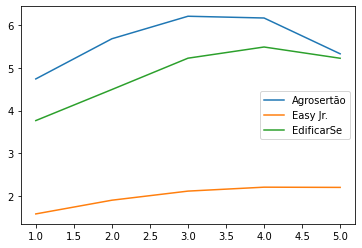

In [5]:
#Carrega as ferramentas de criação de gráficos
%matplotlib inline
from matplotlib import pyplot as plt

#Configura o eixo X do gráfico
X =[0, 1, 2, 3, 4, 5, 6]

#Mostra os sinais das 3 primeiras EJs
for sinal_de_EJ in sinais_das_EJs[:3]:
    
    #Joga o sinal no gráfico
    plt.plot(X[1:-1], sinal_de_EJ.pontos[1:-1])

#Adiciona uma legenda com os nomes das EJs do gráfico
plt.legend([sinal_de_EJ.name for sinal_de_EJ in sinais_das_EJs[:3]])

Interpretando o gráfico acima, notamos que as dores se acumulam de acordo com os clusters de maneira quase linear. Calculando a média dos sinais de todas as EJs, tem-se:

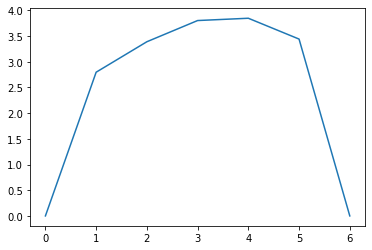

In [6]:
#Calcula a média
EJ_média = sum(sinais_das_EJs)/len(sinais_das_EJs)

#Joga no gráfico
plt.plot(X, EJ_média.pontos)

Para entender os padrões de variação dos sinais de cluster da rede sergipana de acordo com a PCA, é preciso subtrair a média de cada sinal:

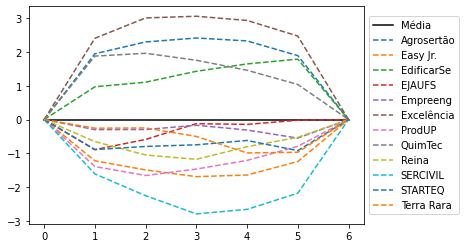

In [7]:
#Centraliza os sinais em relação à média
sinais_centrados = [EJ - EJ_média for EJ in sinais_das_EJs]

#Põe a média no gráfico em preto com traço cheio
plt.plot(X, [0] * 7, "black")

#Põe os sinais centrados no gráfico com traço vazado
for EJ in sinais_centrados:
    plt.plot(X, EJ.pontos, "--")

#Adiciona a legenda
plt.legend(["Média"] + [sinal_de_EJ.name for sinal_de_EJ in sinais_das_EJs], loc="center left", bbox_to_anchor=(1, 0.5))

Encontrar as componentes principais consiste em determinar os eixos de maior variação a partir da média. Isto é feito a partir:

1. Da determinação da matriz de covariância. É uma matriz que estabelece como as dimensões dos dados estão relacionadas entre si.

2. Do cálculo dos autovetores e autovalores. Os autovetores representam os eixos, perpendiculares entre si, onde há maior variação. Seus autovalores representam quanto os dados variam na direção correspondente. 

In [8]:
#Traz a ferramenta de cálculo de autovetores e autovalores
from numpy.linalg import eig as auto

#Cálculo da matriz de covariância
cov = covariância_EJs = [
    [sum([sinais_centrados[k][i]
          * sinais_centrados[k][j]
                     for k in range(len(EJs))]
        )/len(EJs)
        
        for j in range(5)]
        for i in range(5)]

#Retorna as variâncias (autovalores) e suas
#correspondentes direções (autovetores)
variâncias, vetores = auto(cov)

#Consegue as posições das variâncias necessárias
#para que sejam dispostas em ordem decrescente
índices = variâncias.argsort()[::-1]

#Põe as variâncias e seus respectivos vetores em ordem decrescente
variâncias = variâncias[índices]
vetores = vetores[:, índices]

#Transforma as variâncias em escalares
variâncias = [float(var) for var in variâncias]

Rankeando os valores das variâncias em cada eixo, descobre-se que um dos eixos concentra a maior parte da variação:

In [9]:
#Cria o ranking mostrado abaixo
print("""
  Variância  Percentual
  
1ª: {0:.2f}  | {5:.2f}% do total
2ª:  {1:.2f}  | {6:.2f}% do total 
3ª:  {2:.2f}  | {7:.2f}% do total 
4ª:  {3:.2f}  | {8:.2f}% do total 
5ª:  {4:.3f} | {9:.2f}% do total 
""".format(*variâncias, *[100 * var/sum(variâncias) for var in variâncias])
     )


  Variância  Percentual
  
1ª: 11.79  | 97.75% do total
2ª:  0.21  | 1.74% do total 
3ª:  0.05  | 0.43% do total 
4ª:  0.01  | 0.07% do total 
5ª:  0.002 | 0.02% do total 



Utilizando somente os 2 primeiros vetores como eixos (que contém juntos 99,5% de toda a variação), chega-se a:

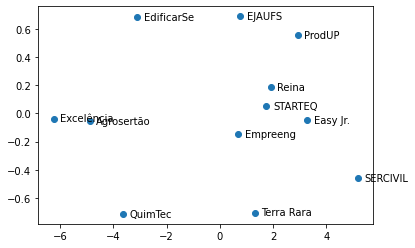

In [10]:
projeção = (vetores[:, [0, 1]].T
            @ np.hstack([sinal.T for sinal in sinais_centrados])
)

plt.scatter(projeção[0], projeção[1])

for i, sinal in enumerate(sinais_das_EJs):
    plt.annotate(sinal.name, (projeção[0][i] + 0.25, projeção[1][i] - 0.02))

Percebe-se que as EJs se dividiram naturalmente em 6 grupos distintos:

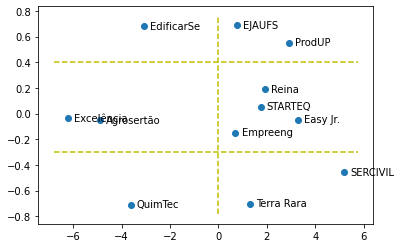

In [11]:
plt.scatter(projeção[0], projeção[1])

for i, sinal in enumerate(sinais_das_EJs):
    x, y = projeção[0][i], projeção[1][i]
    if y > 0.4:
        if x < 0: sinal.grupo = "Grupo 1"
        else:     sinal.grupo = "Grupo 2"
    elif y >-0.3:
        if x < 0: sinal.grupo = "Grupo 3"
        else:      sinal.grupo ="Grupo 4"
    else:
        if x < 0: sinal.grupo = "Grupo 5"
        else:      sinal.grupo ="Grupo 6"
            
    plt.annotate(sinal.name, (x + 0.25, y - 0.02))

y_lim_i, y_lim_s = plt.ylim()
x_lim_i, x_lim_s = plt.xlim()
    
plt.plot([x_lim_i, x_lim_s], [0.4, 0.4], "y--")
plt.plot([x_lim_i, x_lim_s], [-0.3, -0.3], "y--")
plt.plot([0, 0], [y_lim_i, y_lim_s], "y--")

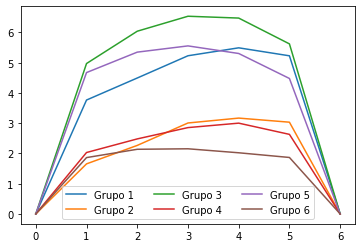

In [12]:
Média_Grupo = dict()

for i in range(1, 6 + 1):
    EJs_do_grupo = [EJ for EJ in sinais_das_EJs if EJ.grupo == "Grupo {}".format(i)]
    Média_Grupo[i] = sum(EJs_do_grupo)/len(EJs_do_grupo)
    
for i in Média_Grupo:
    plt.plot(X, Média_Grupo[i].pontos)
    
plt.legend(["Grupo {}".format(i) for i in range(1, 6 + 1)], ncol=3)

### Análise Fatorial

Esta técnica consiste em olhar para as respostas que estão mais correlacionadas e, a partir delas, inferir fatores ocultos.

In [19]:
#Importa do R os dados não processados
%R -o entrada

#Elimina a coluna com o nome das EJs
entrada.drop(columns=["EJs"], inplace=True)

#Mostra um recorte da tabela original
entrada.iloc[:, ::5]

,MN_1_1,MN_3_2,VM_1_1,VM_3_2,GO_1_1,GO_3_2,GO_5_3,TC_2_2,TC_4_1
1,0,4,3,4,4,0,4,2,4
2,4,2,3,3,3,3,3,3,2
3,1,1,1,2,1,1,1,1,3
4,1,1,0,1,0,3,2,2,2
5,3,1,0,0,0,1,0,0,3
6,1,0,2,2,0,1,2,1,2
7,1,0,2,3,0,0,3,0,2
8,0,0,0,0,0,0,0,0,0
9,0,1,1,3,0,3,3,1,2
10,0,4,1,0,0,0,1,2,0


Para garantir que a AF pode ser aplicada aos dados, realiza-se o teste Kaiser-Meyer-Olkin que deve resultar em um valor superior a 0,6.

In [51]:
#Prepara os dados para análise
dados = pd.concat([entrada]*100)

#Traz o método de validação da Análise Fatorial para uso
from factor_analyzer.factor_analyzer import calculate_kmo as KMO

#Realiza o teste
_, kmo = KMO(dados)

#Mostra o resultado
"KMO dos dados: {:.3f}".format(kmo)

/usr/local/lib/python3.8/dist-packages/factor_analyzer/utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


'KMO dos dados: 0.668'

Garantido que os dados comportam a análise, seleciona-se o número de fatores ocultos relevantes. Para tal, basta que eles possuam uma influência de ao menos uma unidade na variância dos dados.

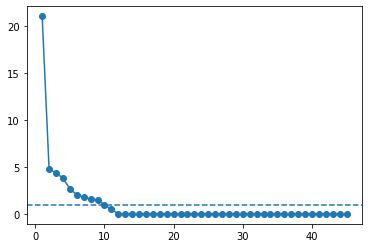

In [56]:
#Traz a ferramenta de Análise Fatorial para uso
from factor_analyzer import FactorAnalyzer

#Realiza a análise chutando que existem 10 fatores
#não observados de forma direta
fa = FactorAnalyzer(n_factors=10).fit(dados)

#Retorna as variância correspondentes
variâncias, vetores = fa.get_eigenvalues()

#Mostra as variâncias no gráfico abaixo
plt.scatter(range(1, len(variâncias) + 1), variâncias)
plt.plot(range(1, len(variâncias) + 1), variâncias)
plt.axhline(1, ls="--")

9 fatores se mostraram relevantes. O próximo passo é entender em quais dores cada fator impacta:

In [73]:
#Realiza a análise considerando 9 fatores ocultos
fa = FactorAnalyzer(n_factors=9, rotation="varimax", method="ml").fit(dados)

#Forma uma tabela com o peso que cada fator tem em cada uma das dores
pesos = pd.DataFrame(fa.loadings_,
                     index=entrada.columns,
                     columns=["Fator {}".format(i) for i in range(1, 9 + 1)])
pesos.head()

/usr/local/lib/python3.8/dist-packages/factor_analyzer/factor_analyzer.py:417: RuntimeWarning: invalid value encountered in log
  error = -(np.sum(np.log(values) - values) -
/usr/local/lib/python3.8/dist-packages/factor_analyzer/factor_analyzer.py:536: UserWarning: Failed to converge: b'ABNORMAL_TERMINATION_IN_LNSRCH'
  warnings.warn('Failed to converge: {}'.format(res.message))


,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6,Fator 7,Fator 8,Fator 9
MN_1_1,0.096958,0.101267,-0.019286,0.456746,-0.311860,0.674628,-0.018981,0.229355,0.328691
MN_1_2,0.314255,0.516119,0.081790,0.215020,0.012100,0.127399,0.317727,0.181422,0.629455
MN_2_1,-0.196399,0.666228,0.214213,0.221008,-0.257809,0.501520,0.169109,0.124106,0.152562
MN_2_2,0.351919,0.122261,0.191084,-0.120722,-0.122250,0.425940,0.714302,0.182986,0.081592
MN_3_1,0.371236,0.299391,0.656380,0.241820,0.180469,0.449557,-0.085802,0.120400,0.148548


Rankeando as dores em que cada fator produz mais influência

In [84]:
n = número_de_linhas = 10

ranking = pd.DataFrame()

for fator in pesos.columns:
    ordenação = np.array([abs(p) for p in pesos[fator]]).argsort()[::-1]
    ranking[fator] = pesos.index[ordenação][:n]
    ranking["Inf. de F{}".format(fator[-1])] = np.array(pesos[fator])[ordenação][:n]
    
ranking.index = range(1, número_de_linhas + 1)

ranking

,Fator 1,Inf. de F1,Fator 2,Inf. de F2,Fator 3,Inf. de F3,Fator 4,Inf. de F4,Fator 5,Inf. de F5,Fator 6,Inf. de F6,Fator 7,Inf. de F7,Fator 8,Inf. de F8,Fator 9,Inf. de F9
1,MN_5_2,0.865403,GO_3_1,0.854497,MN_3_2,0.896841,GO_5_2,0.824498,TC_1_2,-0.866915,VM_5_2,0.732908,TC_1_1,0.912592,GO_3_2,0.831406,MN_1_2,0.629455
2,GO_5_3,0.803823,TC_2_1,0.853089,TC_4_2,0.874347,VM_2_2,0.656332,GO_2_1,0.780496,TC_4_3,0.720750,MN_2_2,0.714302,TC_3_2,0.671735,TC_2_2,0.488556
3,GO_4_2,0.758221,VM_1_2,0.829135,TC_5_2,0.831448,MN_4_1,0.616531,GO_1_2,0.729493,MN_1_1,0.674628,TC_3_3,0.570885,TC_2_2,0.457031,VM_1_1,0.470644
4,VM_3_2,0.753950,GO_2_2,0.797854,MN_3_1,0.656380,GO_5_1,0.573766,VM_2_2,0.500708,TC_4_1,0.555872,VM_4_1,-0.464891,TC_3_1,0.418316,MN_4_2,0.441157
5,GO_5_1,0.736484,MN_2_1,0.666228,TC_5_1,0.643354,GO_4_1,0.564992,VM_4_1,0.498634,MN_2_1,0.501520,TC_2_2,0.429888,GO_1_2,-0.334826,TC_3_1,-0.397004
6,VM_5_1,0.719220,VM_3_1,0.572806,GO_4_1,0.593754,VM_3_1,0.542610,GO_1_1,0.476538,TC_1_3,0.477689,GO_1_2,0.423111,VM_2_1,0.297441,GO_1_1,0.351554
7,VM_1_1,0.718997,MN_4_1,0.564634,TC_1_3,0.581832,MN_1_1,0.456746,VM_2_1,0.471964,MN_3_1,0.449557,TC_3_1,0.415088,MN_5_2,-0.272068,GO_4_1,0.343811
8,VM_4_2,0.689540,TC_4_1,0.551035,TC_3_1,0.513510,GO_4_2,0.414943,TC_3_3,0.409669,MN_2_2,0.425940,VM_5_1,0.402830,GO_5_1,0.266799,MN_1_1,0.328691
9,MN_5_1,0.673417,VM_2_1,0.521646,TC_2_3,0.509286,VM_5_1,-0.406540,MN_4_2,0.403696,TC_2_3,0.386253,VM_4_2,0.391887,TC_3_3,0.261661,MN_4_1,0.305193
10,MN_4_2,0.614651,MN_1_2,0.516119,TC_2_2,0.503775,GO_2_1,0.373099,TC_3_2,0.371628,MN_5_1,0.376660,TC_1_3,0.363087,MN_4_2,-0.249246,VM_1_2,0.251699


In [88]:
ranking.iloc[:, 1::2].apply(lambda x: "{:.2f}%".format(10 * sum([a**2 for a in x])))

Inf. de F1    54.22%
Inf. de F2    47.15%
Inf. de F3    45.73%
Inf. de F4    31.19%
Inf. de F5    33.11%
Inf. de F6    29.75%
Inf. de F7    28.69%
Inf. de F8    20.03%
Inf. de F9    17.15%
dtype: object

In [94]:
#Realiza a análise considerando 5 fatores ocultos
fa = FactorAnalyzer(n_factors=5, rotation="varimax", method="ml").fit(dados)

#Forma uma tabela com o peso que cada fator tem em cada uma das dores
pesos = pd.DataFrame(fa.loadings_,
                     index=entrada.columns,
                     columns=["Fator {}".format(i) for i in range(1, 5 + 1)])

n = número_de_linhas = 10
ranking = pd.DataFrame()

for fator in pesos.columns:
    ordenação = np.array([abs(p) for p in pesos[fator]]).argsort()[::-1]
    ranking[fator] = pesos.index[ordenação][:n]
    ranking["Inf. de F{}".format(fator[-1])] = np.array(pesos[fator])[ordenação][:n]
    
ranking.index = range(1, número_de_linhas + 1)

ranking

/usr/local/lib/python3.8/dist-packages/factor_analyzer/factor_analyzer.py:417: RuntimeWarning: invalid value encountered in log
  error = -(np.sum(np.log(values) - values) -
/usr/local/lib/python3.8/dist-packages/factor_analyzer/factor_analyzer.py:536: UserWarning: Failed to converge: b'ABNORMAL_TERMINATION_IN_LNSRCH'
  warnings.warn('Failed to converge: {}'.format(res.message))


,Fator 1,Inf. de F1,Fator 2,Inf. de F2,Fator 3,Inf. de F3,Fator 4,Inf. de F4,Fator 5,Inf. de F5
1,GO_4_2,0.909564,TC_4_2,0.851418,TC_2_1,0.825354,TC_1_2,0.919922,VM_5_1,0.901856
2,MN_5_2,0.864785,TC_5_2,0.844630,GO_3_1,0.775825,MN_1_1,0.637243,GO_5_3,0.537181
3,GO_5_1,0.819654,TC_1_3,0.826940,VM_1_2,0.759558,GO_1_2,-0.629887,MN_2_2,0.519273
4,GO_5_2,0.739956,MN_3_2,0.821183,VM_4_1,0.736951,GO_2_1,-0.599672,GO_5_2,-0.447594
5,VM_1_1,0.729221,TC_3_3,0.781793,VM_2_1,0.699816,MN_2_1,0.516245,VM_4_1,-0.445207
6,VM_3_2,0.715114,TC_1_1,0.727722,GO_2_2,0.681647,VM_5_2,0.443476,TC_1_1,0.439054
7,VM_4_2,0.691662,TC_3_1,0.670448,TC_4_1,0.665385,GO_3_2,0.367174,TC_2_2,0.430905
8,MN_4_2,0.634929,TC_2_3,0.653583,MN_4_1,0.665253,MN_5_1,0.353889,TC_5_2,-0.410354
9,TC_5_1,0.632273,TC_2_2,0.651965,VM_3_1,0.663513,MN_2_2,0.340288,MN_1_2,0.380261
10,GO_2_1,0.620590,TC_4_3,0.646029,MN_2_1,0.653540,TC_5_1,-0.331155,VM_1_1,0.359975


Analisando as 5 dores cada fator prevê com mais precisão, chegamos a:

In [102]:
#Importa as descrições das dores
descrição = pd.read_csv(os.path.join("dados", "descrição_das_dores.csv"))

fatores = pesos.columns

for fator in fatores:
    print("Dores associadas ao Fator {}:".format(fator[-1]))
    for i in range(1, 5 + 1):
        print("{}. {: .2f}% - {}: {}".format(
              i,
              100 * ranking["Inf. de F{}".format(fator[-1])][i],
              ranking[fator][i],
              descrição[ranking[fator][i]][0]))
    print("\n")

Dores associadas ao Fator 1:
1.  90.96% - GO_4_2: Não conseguimos inovar e explorar oportunidades no nosso modelo de negócios para ganhar competitividade no mercado.
2.  86.48% - MN_5_2: Não conseguimos desenvolver inovações disruptivas (que quebram padrões) e criativas para se destacar no mercado.
3.  81.97% - GO_5_1: Nossa estratégia não está voltada para a inovação no modelo de negócios.
4.  74.00% - GO_5_2: Nosso design organizacional não é completamente voltado para gerar o maior valor para o cliente.
5.  72.92% - VM_1_1: Não sabemos como buscar clientes para fechar projetos em nossa EJ e sempre vendemos os mesmos projetos, que são muito simples.


Dores associadas ao Fator 2:
1.  85.14% - TC_4_2: Nosso time é pouco empoderado para assumir maiores responsabilidades.
2.  84.46% - TC_5_2: Não conseguimos garantir a melhor performance de todos os membros reforçada pela cultura forte da EJ.
3.  82.69% - TC_1_3: Não existe uma formação de time na EJ com uma coesão interna suficiente pa